# Assignment 3

This is a simulation assignment. All the required python code and packages are defined inside this notebook.

### Usage instructions

The notebook will use the scripts `water2.py` and `arBox.py` to study the dynamics of water molecules and liquid argon. You don't need to directly access or modify the files, they are run using the functions `simulate_*()`. The assignment requires that you run the scripts multiple times. To do so while reporting all your work, you need to create multiple versions of the `parms` dictionary and multiple versions of your results. For example:

```python
parms_1 = {
    'steps':100,
    'skip_steps':1,
    'temperature':75.,
    'dt': 1. * unit.femtoseconds,
    'ensemble':'NVT'
}

parms_2 = {
    'steps':50,
    'skip_steps':2,
    'temperature':100.,
    'dt': 1. * unit.femtoseconds,
    'ensemble':'NVT'
}
```

The function `simulate()` (defined separately for each part of the assignment) calls the functions inside `water2.py` or `arBox.py`. You can run the simulations multiple times while storing the results in separate variables (whose names preferrably match with the parameter variable names). For example:

```python
results_1 = simulate_solidwater(parms_1)
results_2 = simulate_solidwater(parms_2)
```

##### Note:
- the next two code blocks will set up the environment
- please make sure to run all code blocks sequentially
- please make sure to [publish](https://deepnote.com/docs/publish-projects) the notebook when you are done with your work and export the published page to pdf, it helps make sure everything is readable for grading

In [1]:
# environment setup - packages
# NOTE: takes a couple of minutes to run
!conda install -c conda-forge openmm
!conda install -c conda-forge openmmtools=0.20.3
!conda install -c conda-forge mdtraj

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [2]:
# environment setup - scripts
import sys
sys.path.append('./work/')

from openmm import unit

### 1 - Water: NVE

In [3]:
# make sure to run this codeblock :)
def simulate_solidwater(parms):

    from functions import water2

    parm_error = water2.check_parms(parms)

    if not parm_error:
        water2.prepare_system(parms)
        water2.minimize()
        water2.prepare_sim(parms)
        water2.run_sim(parms)
        results = water2.analyse()

        return(results)
    else:
        results = None

Use the `simulate_solidwater()` function to study the dynamics of two rigid water molecules under NVE (micro-canonical) conditions.

1. Report all the parameters of your simulation

In [4]:
# change your parameters here
parms_1 = {
    'steps':100,
    'skip_steps':1,
    'temperature':100.,
    'dt': 1 * unit.femtoseconds,
    'ensemble':'NVE',
}

parms_2 = {
    # second set of parameters
    'steps':200,
    'skip_steps':1,
    'temperature':20.,
    'dt': 1 * unit.femtoseconds,
    'ensemble':'NVE',
}

# run the sim here (check usage instructions for help):
SWresult_1 = simulate_solidwater(parms_1)
SWresult_2 = simulate_solidwater(parms_2)

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
1.0%	1	-27.467698775915153	50.189279106654766	0	--
2.0%	2	-27.424316951861385	49.0345564852063	18.6	0:00
3.0%	3	-27.354569786283793	47.17758901448869	20.8	0:00
4.0%	4	-27.262581005167757	44.728091292036126	20.2	0:00
5.0%	5	-27.15361231708112	41.82608471707227	19	0:00
6.0%	6	-27.033713346734825	38.63259427329637	19.3	0:00
7.0%	7	-26.909337113906307	35.31942330164499	19.2	0:00
8.0%	8	-26.786950344503953	32.058783422930084	18.7	0:00
9.0%	9	-26.672664681183203	29.013472903010335	19.4	0:00
10.0%	10	-26.571909698305582	26.32816111482275	20.1	0:00
11.0%	11	-26.48916271153561	24.12218063456301	20.1	0:00
12.0%	12	-26.42774472293903	22.484078758069444	20.7	0:00
13.0%	13	-26.3896871254944	21.4680545798124	21.3	0:00
14.0%	14	-26.375670268887614	21.09231335413576	19.3	0:00
15.0%	15	-26.385032562444604	21.339304230340325	19.5	0:00
16.0%	16	-26.415847107013775	22.157761425034785	19.5	0:00
17.0%	17	

2. Plot the kinetic, potential, and total energies (stored in newly created results dictionary). 
Remark on each of their behaviours; how do they change over time? do they plateau, go up/down? do the results match what you know of NVE ensembles?

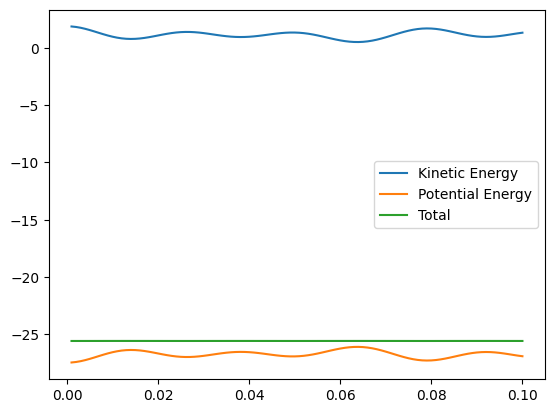

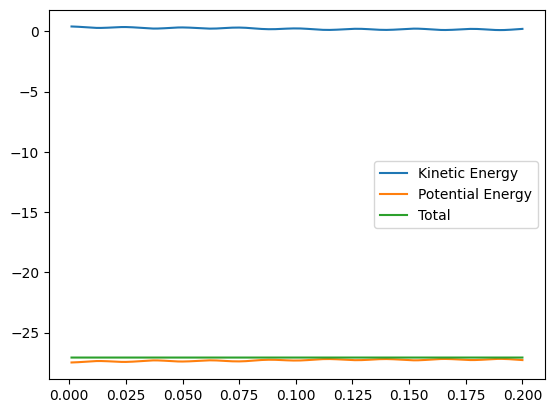

In [5]:
import matplotlib.pyplot as plt

# plots
# (feel free to separate into more codeblocks)
# (just make sure to enable them when publishing, i.e. double check your output pdf)
#plt(SWresult_1['Step'],SWresult_1['Temperature'],SWresult_1['Potential Energy (kJ/mole)'])
#SWresult_1["Step"]
plt.plot(SWresult_1["time"],SWresult_1["kinE"],SWresult_1["time"],SWresult_1["potE"],SWresult_1["time"],SWresult_1["totalE"])
plt.legend(["Kinetic Energy","Potential Energy", "Total"])
plt.show()
plt.plot(SWresult_2["time"],SWresult_2["kinE"],SWresult_2["time"],SWresult_2["potE"],SWresult_2["time"],SWresult_2["totalE"])
plt.legend(["Kinetic Energy","Potential Energy", "Total"])
plt.show()

Ans >  The Kinetic Energy and Potential energy seem complemnetary to each other, while total energy is constant. This agrees with the general NVE model of an isolated system where total energy of a system is constant and any converstion of energies is between Kinetic and Potential. There's no plateu for given duration, but Potential and Kinetic energy fluctuate a bit, Potential energy increases by the same amount Kinetic energy decreases byand vice versa.

3. Compute the average and variance of the kinetic, potential, and total energies. 
Vary the length of the simulation for a constant time step (`dt`), what do you observe?
For a fixed number of time steps, what happens when you vary the distance between them (`dt`)?
Which quantity do you expect will be conserved?

In [6]:
# space for multiple simulation runs
parms_3 = {
    'steps':200,
    'skip_steps':1,
    'temperature':80.,
    'dt': 1 * unit.femtoseconds,
    'ensemble':'NVT',
}
parms_4 = {
    # second set of parameters
    'steps':100,
    'skip_steps':1,
    'temperature':80.,
    'dt': 1* unit.femtoseconds,
    'ensemble':'NVT',
}
parms_13 = {
    # second set of parameters
    'steps':500,
    'skip_steps':1,
    'temperature':80.,
    'dt': 1* unit.femtoseconds,
    'ensemble':'NVT',
}
parms_5 = {
    # second set of parameters
    'steps':200,
    'skip_steps':1,
    'temperature':80.,
    'dt': 5 * unit.femtoseconds,
    'ensemble':'NVT',
}
parms_6 = {
    # second set of parameters
    'steps':200,
    'skip_steps':1,
    'temperature':80.,
    'dt': 10 * unit.femtoseconds,
    'ensemble':'NVT',
}

SWresult_3 = simulate_solidwater(parms_3)
SWresult_4 = simulate_solidwater(parms_4)
SWresult_13 = simulate_solidwater(parms_13)
SWresult_5 = simulate_solidwater(parms_5)
SWresult_6 = simulate_solidwater(parms_6)



5.0%	5	-27.19304110070105	88.87128894027411	21.4	0:00
6.0%	6	-27.08155772707118	86.20035147840954	20.3	0:00
7.0%	7	-26.960664327039005	84.0289966217538	13.2	0:00
8.0%	8	-26.834649949290124	79.02664399634845	13.9	0:00
9.0%	9	-26.70067708601345	75.10820677958824	14.9	0:00
10.0%	10	-26.56795260598623	70.07752860589092	15.7	0:00
11.0%	11	-26.437793226682473	68.64257549375083	16.1	0:00
12.0%	12	-26.313701464745257	65.10229045819781	16.5	0:00
13.0%	13	-26.195561714672536	63.50211977481975	17	0:00
14.0%	14	-26.08180201584932	61.28693715905739	17.3	0:00
15.0%	15	-25.97432455496488	56.18878719545383	17.8	0:00
16.0%	16	-25.8725365846415	55.33843124909485	18	0:00
17.0%	17	-25.776606285223423	52.50385689435103	18.2	0:00
18.0%	18	-25.68948765187347	48.90434273657167	18.4	0:00
19.0%	19	-25.61198275196626	47.511271575083576	18.8	0:00
20.0%	20	-25.54000711412081	44.39938515660008	18.9	0:00
21.0%	21	-25.474255417888834	41.56259510553732	18.7	0:00
22.0%	22	-25.414228171592455	36.354660326045355	18.6	0:0

dict_keys(['potE', 'kinE', 'positions', 'totalE', 'time', 'nsteps', 'rOO'])


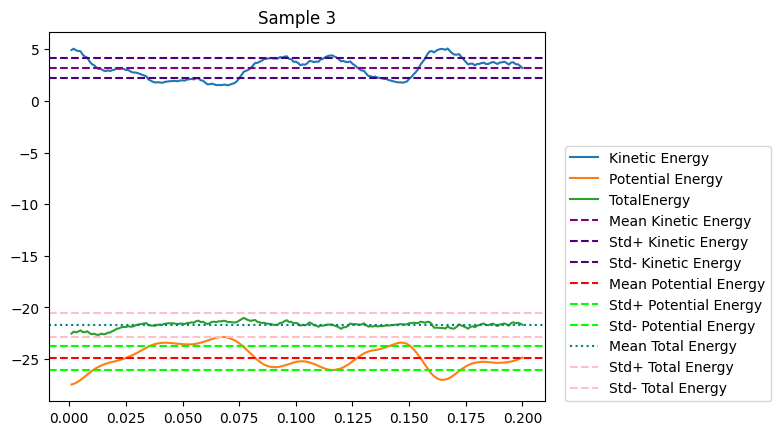

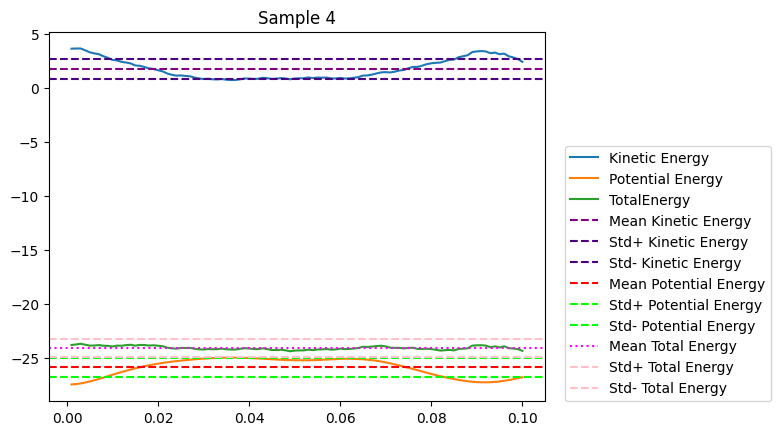

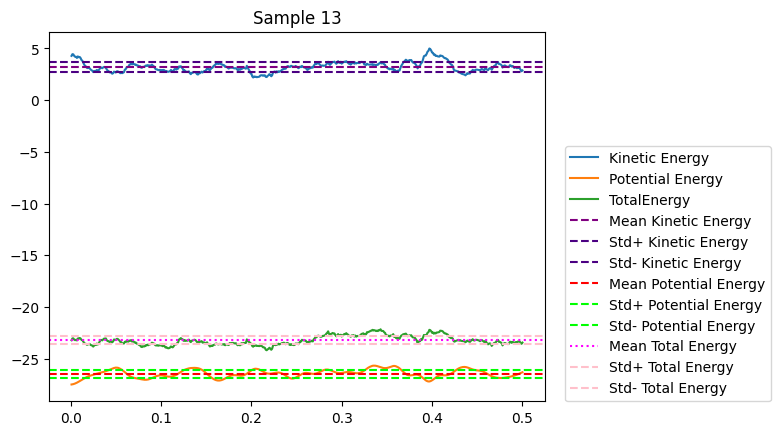

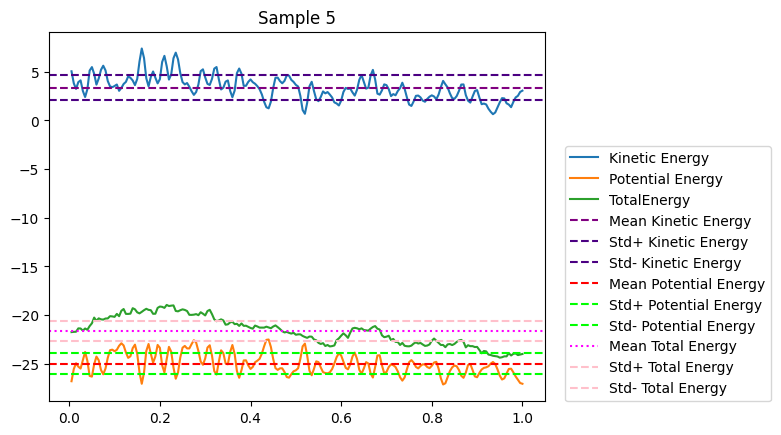

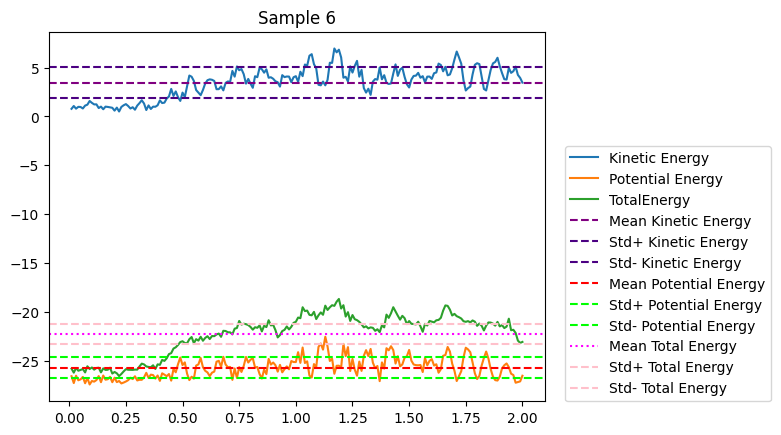

In [7]:
# plots for average and variance
# (feel free to separate into more codeblocks)
# (just make sure to enable them when publishing, i.e. double check your output pdf)
print(SWresult_3.keys())
import numpy as np

plt.plot(SWresult_3["time"],SWresult_3["kinE"])
plt.plot(SWresult_3["time"],SWresult_3["potE"])
plt.plot(SWresult_3["time"],SWresult_3["totalE"])
plt.axhline(y= np.mean(SWresult_3["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["kinE"])+np.std(SWresult_3["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["kinE"])-np.std(SWresult_3["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_3["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["potE"])+np.std(SWresult_3["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["potE"])-np.std(SWresult_3["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_3["totalE"]), color ="teal", linestyle =":")
plt.axhline(y= np.mean(SWresult_3["totalE"])+np.std(SWresult_3["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["totalE"])-np.std(SWresult_3["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))

plt.title("Sample 3")
plt.show()


plt.plot(SWresult_4["time"],SWresult_4["kinE"],
SWresult_4["time"],SWresult_4["potE"],
SWresult_4["time"],SWresult_4["totalE"])

plt.axhline(y= np.mean(SWresult_4["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["kinE"])+np.std(SWresult_4["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["kinE"])-np.std(SWresult_4["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_4["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["potE"])+np.std(SWresult_4["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["potE"])-np.std(SWresult_4["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_4["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_4["totalE"])+np.std(SWresult_4["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["totalE"])-np.std(SWresult_4["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 4")
plt.show()

plt.plot(SWresult_13["time"],SWresult_13["kinE"],
SWresult_13["time"],SWresult_13["potE"],
SWresult_13["time"],SWresult_13["totalE"])

plt.axhline(y= np.mean(SWresult_13["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["kinE"])+np.std(SWresult_13["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["kinE"])-np.std(SWresult_13["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_13["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["potE"])+np.std(SWresult_13["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["potE"])-np.std(SWresult_13["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_13["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_13["totalE"])+np.std(SWresult_13["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["totalE"])-np.std(SWresult_13["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 13")
plt.show()


plt.plot(SWresult_5["time"],SWresult_5["kinE"],
SWresult_5["time"],SWresult_5["potE"],
SWresult_5["time"],SWresult_5["totalE"])

plt.axhline(y= np.mean(SWresult_5["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["kinE"])+np.std(SWresult_5["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["kinE"])-np.std(SWresult_5["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_5["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["potE"])+np.std(SWresult_5["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["potE"])-np.std(SWresult_5["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_5["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_5["totalE"])+np.std(SWresult_5["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["totalE"])-np.std(SWresult_5["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 5")
plt.show()

plt.plot(SWresult_6["time"],SWresult_6["kinE"],
SWresult_6["time"],SWresult_6["potE"],
SWresult_6["time"],SWresult_6["totalE"])

plt.axhline(y= np.mean(SWresult_6["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["kinE"])+np.std(SWresult_6["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["kinE"])-np.std(SWresult_6["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_6["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["potE"])+np.std(SWresult_6["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["potE"])-np.std(SWresult_6["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_6["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_6["totalE"])+np.std(SWresult_6["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["totalE"])-np.std(SWresult_6["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 6")
plt.show()

Ans >   for the larger steps the time of simulation increases and total energy is relatively constant with small amounts of fluctuation. For sims with different dT, it appears that with larger dT the total energy seems to fluctutate quite a bit, and both potential and kinetic energy increase significantly, the time duration also increases for larger dT since it is covering more time in the same number of steps.

Note First 3 plots (sample 3,4, 13) are with longer durations and last 2 (sample 3, 5,6) combined with first plot are used to compare dTs

4. Plot the distance between the two oxygen atoms of each water as a function of time (results dictionary, key `rOO`). Do you observe oscillations? Report the mean OO distance along with its variance.

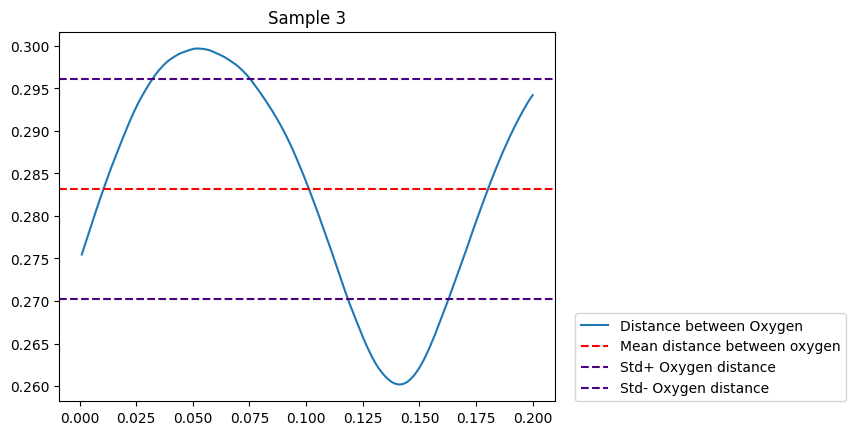

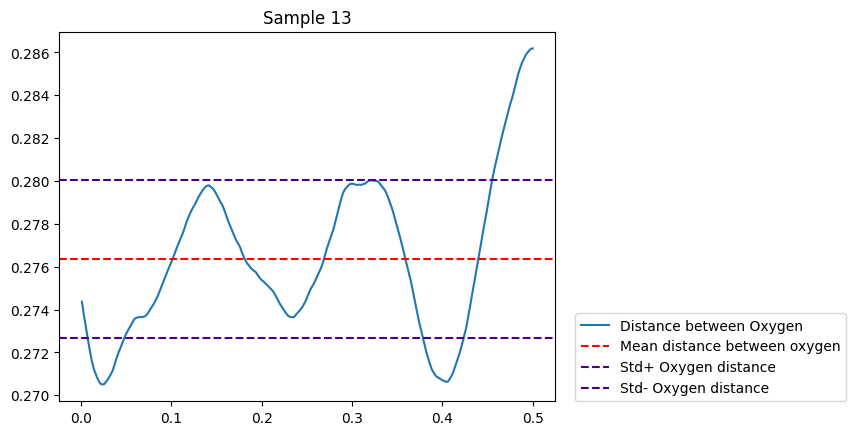

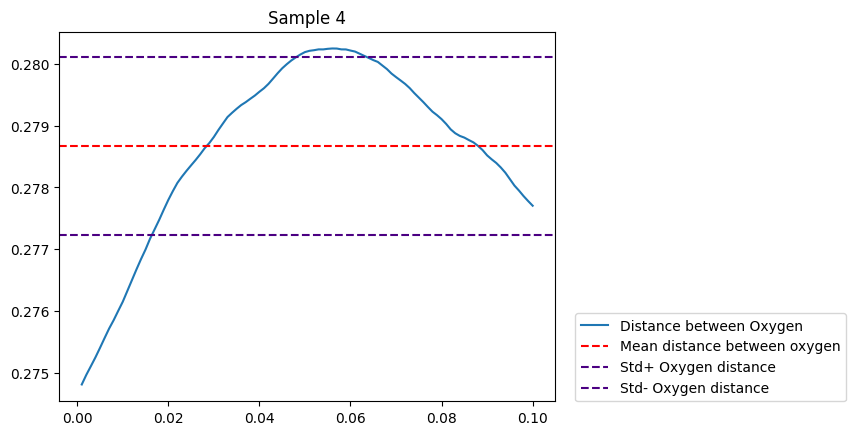

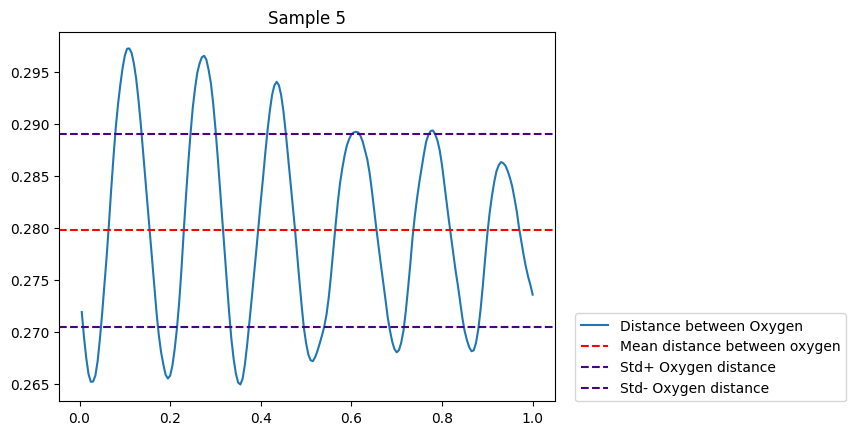

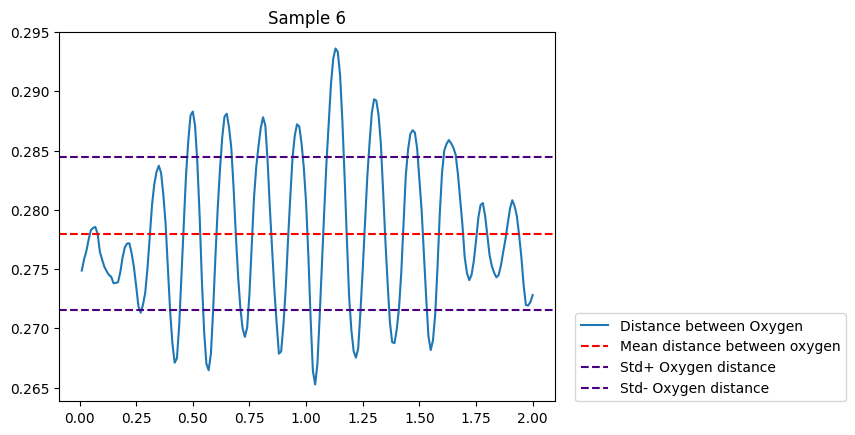

mean of distance Result3 0.2832042 Variance of distance Result3 0.0001672352
mean of distance Result4 0.27867058 Variance of distance Result4 2.066888e-06
mean of distance Result13 0.27634978 Variance of distance Result13 1.3663661e-05
mean of distance Result5 0.2797775 Variance of distance Result4 8.563278e-05
mean of distance Result6 0.27798787 Variance of distance Result4 4.1356776e-05


In [8]:
# plot distance here
plt.plot(SWresult_3["time"],SWresult_3["rOO"])
plt.axhline(y= np.mean(SWresult_3["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["rOO"])+np.std(SWresult_3["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_3["rOO"])-np.std(SWresult_3["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 3")
plt.show()

plt.plot(SWresult_13["time"],SWresult_13["rOO"])

plt.axhline(y= np.mean(SWresult_13["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["rOO"])+np.std(SWresult_13["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_13["rOO"])-np.std(SWresult_13["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 13")
plt.show()

plt.plot(SWresult_4["time"],SWresult_4["rOO"])

plt.axhline(y= np.mean(SWresult_4["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["rOO"])+np.std(SWresult_4["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_4["rOO"])-np.std(SWresult_4["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 4")
plt.show()

plt.plot(SWresult_5["time"],SWresult_5["rOO"])
plt.axhline(y= np.mean(SWresult_5["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["rOO"])+np.std(SWresult_5["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_5["rOO"])-np.std(SWresult_5["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 5")
plt.show()

plt.plot(SWresult_6["time"],SWresult_6["rOO"])

plt.axhline(y= np.mean(SWresult_6["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["rOO"])+np.std(SWresult_6["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_6["rOO"])-np.std(SWresult_6["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 6")
plt.show()


print("mean of distance Result3",np.mean(SWresult_3["rOO"]), "Variance of distance Result3",np.var(SWresult_3["rOO"]))
print("mean of distance Result4",np.mean(SWresult_4["rOO"]), "Variance of distance Result4",np.var(SWresult_4["rOO"]))
print("mean of distance Result13",np.mean(SWresult_13["rOO"]), "Variance of distance Result13",np.var(SWresult_13["rOO"]))
print("mean of distance Result5",np.mean(SWresult_5["rOO"]), "Variance of distance Result4",np.var(SWresult_5["rOO"]))
print("mean of distance Result6",np.mean(SWresult_6["rOO"]), "Variance of distance Result4",np.var(SWresult_6["rOO"]))

Ans > For constant dT but longer duration, the distance between Oxygen seems to be sinusoidal with relatively constant overall fluctuations, but for different dTs we start seeing a wavepacket like behavior for the distance between oxygen atoms.

### 2 - Water: NVT
Use the function `simulate_solidwater()` to study the dynamics of two rigid water molecules under NVT (canonical) conditions (change `ensemble` key to `"NVT"`).

1. Report the parameters of your simulation


In [9]:
# change your parameters here
parms_7 = {
    # place values here
    'steps':100,
    'skip_steps':1,
    'temperature':100.,
    'dt': 1 * unit.femtoseconds,
    'ensemble':'NVT',
}
parms_8 = {
    # place values here
    'steps':200,
    'skip_steps':1,
    'temperature':20.,
    'dt': 1 * unit.femtoseconds,
    'ensemble':'NVT',
}

# run the sim here (check usage instructions for help):
SWresult_7 = simulate_solidwater(parms_7)
SWresult_8 = simulate_solidwater(parms_8)


#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
1.0%	1	-27.477311601354184	126.94709637613039	0	--
2.0%	2	-27.46387156284208	126.28555453158575	23.8	0:00
3.0%	3	-27.440982586898222	129.3728297186382	23.9	0:00
4.0%	4	-27.409746201936745	127.98900277755673	22.8	0:00
5.0%	5	-27.370483744635532	128.36750611515887	21.5	0:00
6.0%	6	-27.32646515942701	128.6672201720422	13.5	0:00
7.0%	7	-27.275938227079994	127.86011343800222	14.1	0:00
8.0%	8	-27.21958481475269	134.0248265011756	14.6	0:00
9.0%	9	-27.160821200614507	131.6269638307017	15.5	0:00
10.0%	10	-27.092585533513578	128.55552065333026	16.2	0:00
11.0%	11	-27.019252319879204	133.6066573773951	16.5	0:00
12.0%	12	-26.944987411681545	129.09112792203263	17	0:00
13.0%	13	-26.86436754773275	132.28347872321822	17.6	0:00
14.0%	14	-26.788566661254126	133.7709996447169	17.7	0:00
15.0%	15	-26.71090099792039	140.22882955771945	18.2	0:00
16.0%	16	-26.630745503922718	139.70828318989942	18.2	0:00
17.0

2. Plot the kinetic, potential, and total energies (stored in newly created results dictionary). Note your observations.

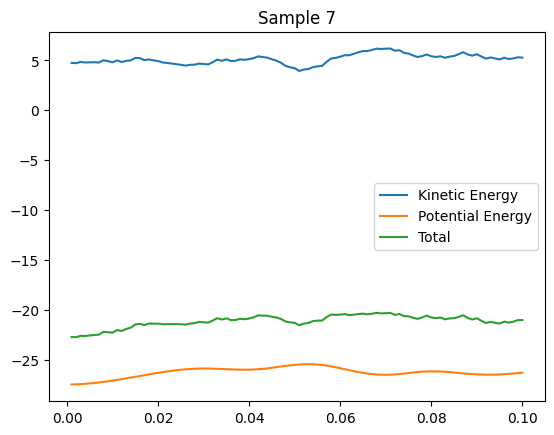

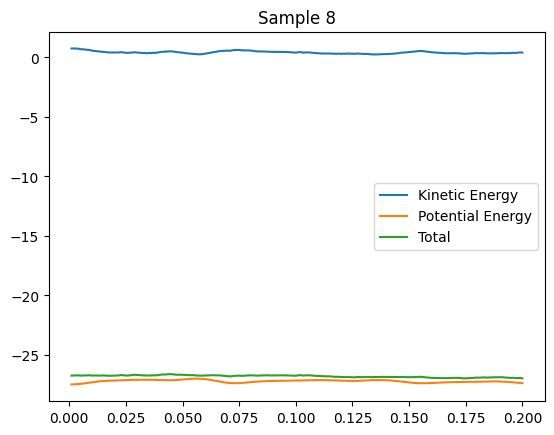

In [10]:
import matplotlib.pyplot as plt

# plots
# (feel free to separate into more codeblocks)
# (just make sure to enable them when publishing, i.e. double check your output pdf)
plt.plot(SWresult_7["time"],SWresult_7["kinE"],
SWresult_7["time"],SWresult_7["potE"],
SWresult_7["time"],SWresult_7["totalE"])
plt.legend(["Kinetic Energy","Potential Energy", "Total"])
plt.title("Sample 7")
plt.show()
plt.plot(SWresult_8["time"],SWresult_8["kinE"],
SWresult_8["time"],SWresult_8["potE"],
SWresult_8["time"],SWresult_8["totalE"])
plt.legend(["Kinetic Energy","Potential Energy", "Total"])
plt.title("Sample 8")
plt.show()


Ans > Kinetic and  Potential energy still look related like previously, when kinetic rises, potential decreases and vice-versa. Total energy also looks somewhat constant but there's more fluctuations this time, this would make sense since in NVT system Energy is allowed to move in and out of the system, so an increasing or decreasing trend can be expected. However it remains somewhat constant, at least for the simulation this text is being written for.

3. Compute the average and variance of the kinetic, potential, and total energies.
Vary the length of the simulation for a constant time step (`dt`), what do you observe?
For a fixed number of time steps, what happens when you vary the distance between them (`dt`)?
Which quantity do you expect will be conserved?

In [11]:
# space for multiple simulation runs
parms_9 = {
    'steps':200,
    'skip_steps':1,
    'temperature':80.,
    'dt': 1 * unit.femtoseconds,
    'ensemble':'NVT',
}
parms_10 = {
    # second set of parameters
    'steps':100,
    'skip_steps':1,
    'temperature':80.,
    'dt': 1* unit.femtoseconds,
    'ensemble':'NVT',
}
parms_14 = {
    # second set of parameters
    'steps':500,
    'skip_steps':1,
    'temperature':80.,
    'dt': 1* unit.femtoseconds,
    'ensemble':'NVT',
}
parms_11 = {
    # second set of parameters
    'steps':200,
    'skip_steps':1,
    'temperature':80.,
    'dt': 2 * unit.femtoseconds,
    'ensemble':'NVT',
}
parms_12 = {
    # second set of parameters
    'steps':200,
    'skip_steps':1,
    'temperature':80.,
    'dt': 5 * unit.femtoseconds,
    'ensemble':'NVT',
}

SWresult_9 = simulate_solidwater(parms_9)
SWresult_10 = simulate_solidwater(parms_10)
SWresult_11 = simulate_solidwater(parms_11)
SWresult_12 = simulate_solidwater(parms_12)
SWresult_14 = simulate_solidwater(parms_14)


5.0%	5	-27.413068863473924	48.664513037842426	22.4	0:00
6.0%	6	-27.388660834592443	47.00083292558278	22.6	0:00
7.0%	7	-27.3614688268525	47.24258121282145	22.1	0:00
8.0%	8	-27.33619113973362	47.213080792448295	21.4	0:00
9.0%	9	-27.31268063991017	45.25781727894699	21.2	0:00
10.0%	10	-27.295297154434863	45.283346202868856	21.5	0:00
11.0%	11	-27.275835360783596	47.78356192385341	20.7	0:00
12.0%	12	-27.257216777095515	47.53593837010838	21.3	0:00
13.0%	13	-27.240680226695172	47.49567343123971	21.9	0:00
14.0%	14	-27.22447041899699	46.41269884020428	21.7	0:00
15.0%	15	-27.212533159087787	48.2130231908485	22	0:00
16.0%	16	-27.201908845198993	47.50356808795344	21.6	0:00
17.0%	17	-27.19287096016764	46.01726753903875	21.1	0:00
18.0%	18	-27.183785092424984	46.73956150034164	20.9	0:00
19.0%	19	-27.174004902107004	46.93295398638714	20.3	0:00
20.0%	20	-27.16354422539228	45.78841788353893	20.5	0:00
21.0%	21	-27.153819850871773	43.15429523512937	20.3	0:00
22.0%	22	-27.142274575954463	45.117254271751044	

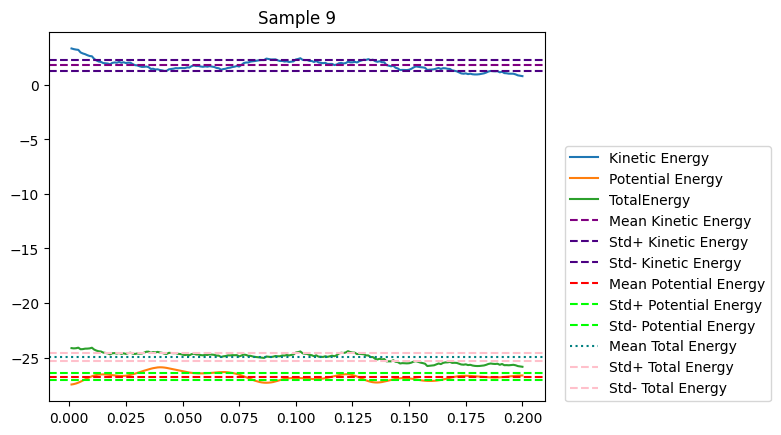

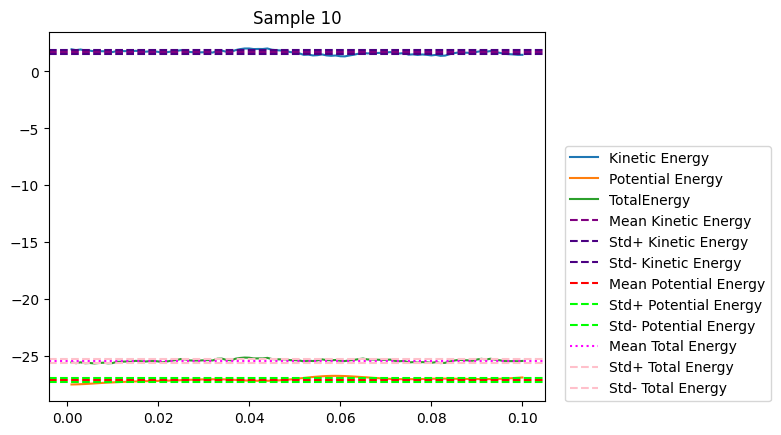

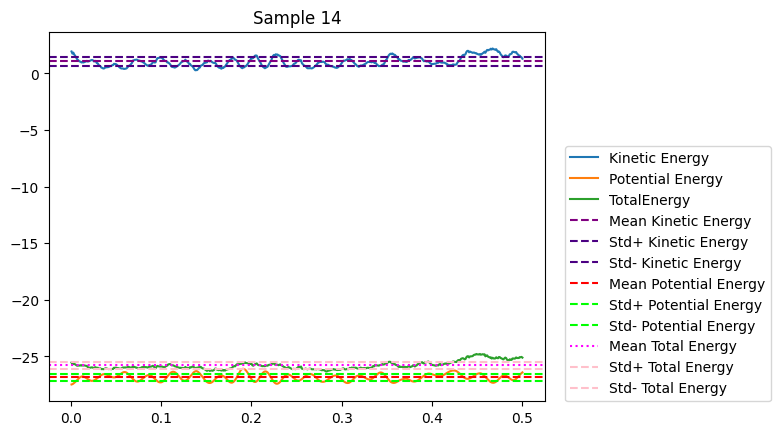

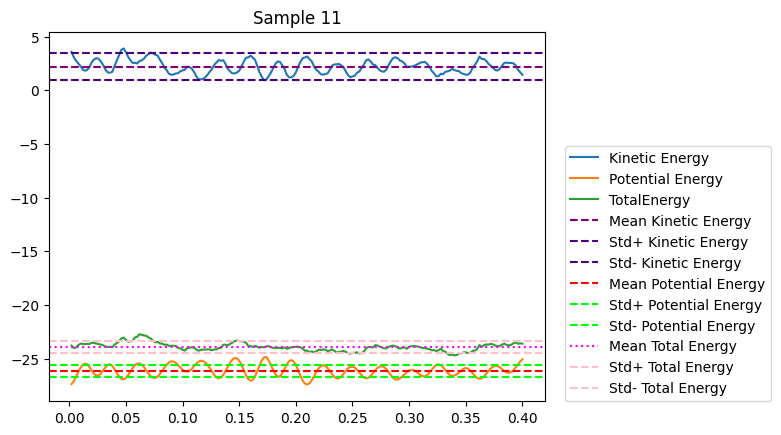

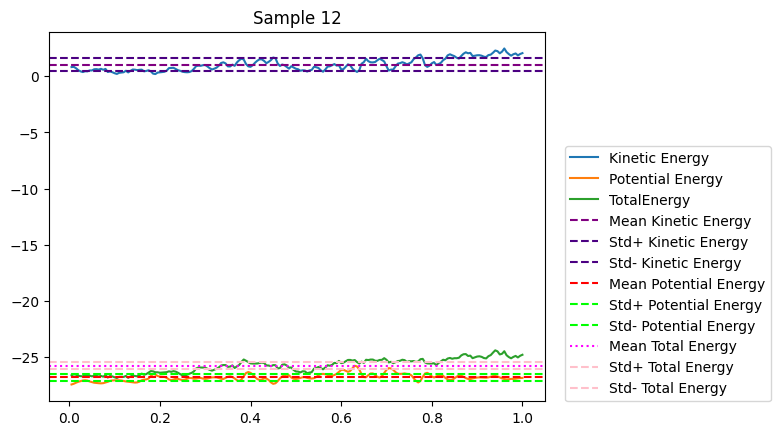

In [12]:
# plots for average and variance
# (feel free to separate into more codeblocks)
# (just make sure to enable them when publishing, i.e. double check your output pdf)
plt.plot(SWresult_9["time"],SWresult_9["kinE"])
plt.plot(SWresult_9["time"],SWresult_9["potE"])
plt.plot(SWresult_9["time"],SWresult_9["totalE"])
plt.axhline(y= np.mean(SWresult_9["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["kinE"])+np.std(SWresult_9["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["kinE"])-np.std(SWresult_9["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_9["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["potE"])+np.std(SWresult_9["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["potE"])-np.std(SWresult_9["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_9["totalE"]), color ="teal", linestyle =":")
plt.axhline(y= np.mean(SWresult_9["totalE"])+np.std(SWresult_9["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["totalE"])-np.std(SWresult_9["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 9")
plt.show()


plt.plot(SWresult_10["time"],SWresult_10["kinE"],
SWresult_10["time"],SWresult_10["potE"],
SWresult_10["time"],SWresult_10["totalE"])

plt.axhline(y= np.mean(SWresult_10["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["kinE"])+np.std(SWresult_10["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["kinE"])-np.std(SWresult_10["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_10["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["potE"])+np.std(SWresult_10["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["potE"])-np.std(SWresult_10["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_10["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_10["totalE"])+np.std(SWresult_10["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["totalE"])-np.std(SWresult_10["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 10")
plt.show()

plt.plot(SWresult_14["time"],SWresult_14["kinE"],
SWresult_14["time"],SWresult_14["potE"],
SWresult_14["time"],SWresult_14["totalE"])

plt.axhline(y= np.mean(SWresult_14["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["kinE"])+np.std(SWresult_14["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["kinE"])-np.std(SWresult_14["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_14["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["potE"])+np.std(SWresult_14["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["potE"])-np.std(SWresult_14["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_14["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_14["totalE"])+np.std(SWresult_14["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["totalE"])-np.std(SWresult_14["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 14")
plt.show()


plt.plot(SWresult_11["time"],SWresult_11["kinE"],
SWresult_11["time"],SWresult_11["potE"],
SWresult_11["time"],SWresult_11["totalE"])

plt.axhline(y= np.mean(SWresult_11["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["kinE"])+np.std(SWresult_5["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["kinE"])-np.std(SWresult_5["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_11["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["potE"])+np.std(SWresult_11["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["potE"])-np.std(SWresult_11["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_11["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_11["totalE"])+np.std(SWresult_11["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["totalE"])-np.std(SWresult_11["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 11")
plt.show()

plt.plot(SWresult_12["time"],SWresult_12["kinE"],
SWresult_12["time"],SWresult_12["potE"],
SWresult_12["time"],SWresult_12["totalE"])

plt.axhline(y= np.mean(SWresult_12["kinE"]), color ="purple", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["kinE"])+np.std(SWresult_12["kinE"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["kinE"])-np.std(SWresult_12["kinE"]), color ="indigo", linestyle ="--")

plt.axhline(y= np.mean(SWresult_12["potE"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["potE"])+np.std(SWresult_12["potE"]), color ="lime", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["potE"])-np.std(SWresult_12["potE"]), color ="lime", linestyle ="--")

plt.axhline(y= np.mean(SWresult_12["totalE"]), color ="magenta", linestyle =":")
plt.axhline(y= np.mean(SWresult_12["totalE"])+np.std(SWresult_12["potE"]), color ="pink", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["totalE"])-np.std(SWresult_12["potE"]), color ="pink", linestyle ="--")

plt.legend(["Kinetic Energy","Potential Energy","TotalEnergy", 
"Mean Kinetic Energy","Std+ Kinetic Energy","Std- Kinetic Energy",
"Mean Potential Energy","Std+ Potential Energy","Std- Potential Energy",
"Mean Total Energy","Std+ Total Energy","Std- Total Energy"], loc=(1.04,0))
plt.title("Sample 12")
plt.show()



Answer> Sample 9,10 and 14 have the same dT but varying time. With larger time we see some fluctuation but they seem more or less around the mean. It's difficult to infer much about this, since they look pretty random. For 9, 11, and 12 similar story, it's hard to say based on the current plots. I have run a few times but it seems to be smoother for smaller time step similar to results from NVE.

4. Plot the distance between the two oxygen atoms of each water as a function of time (results dictionary, key `rOO`). Do you observe oscillations? Report the mean OO distance along with its variance.

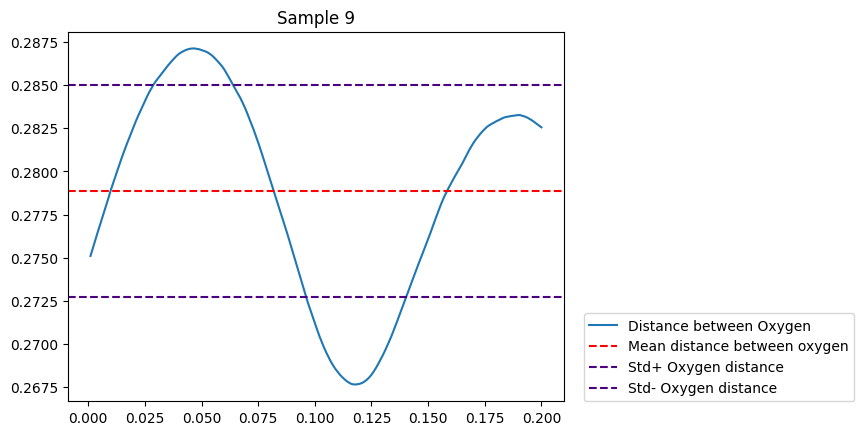

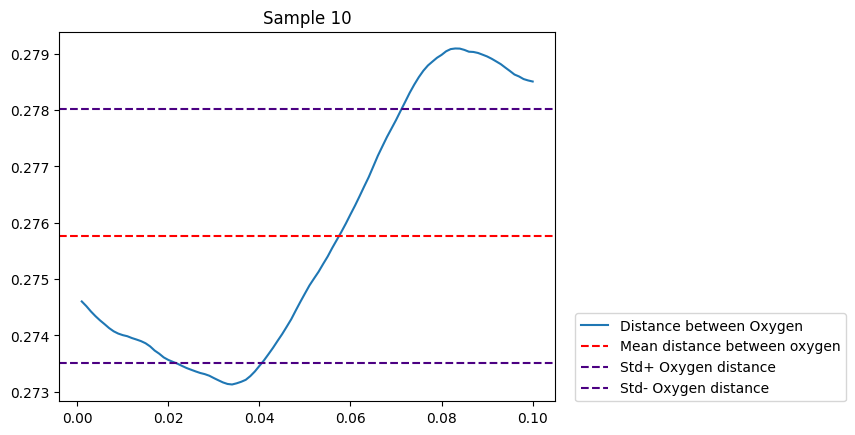

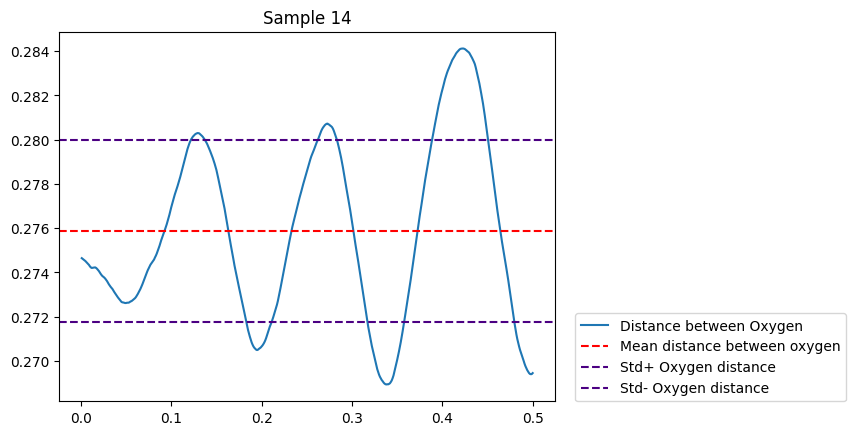

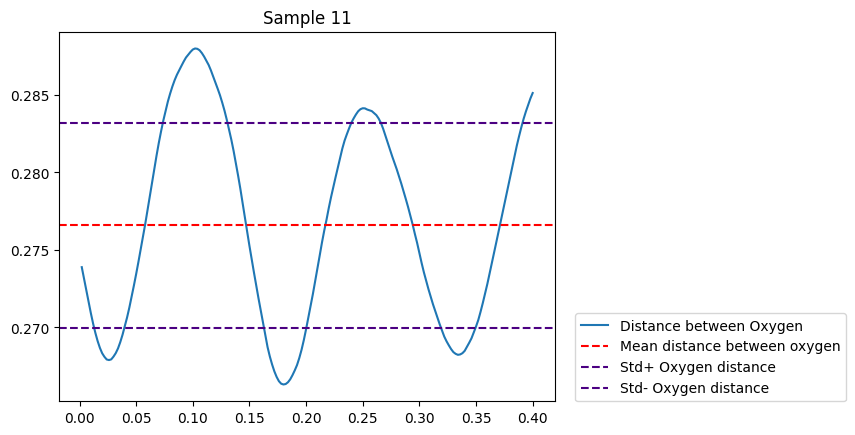

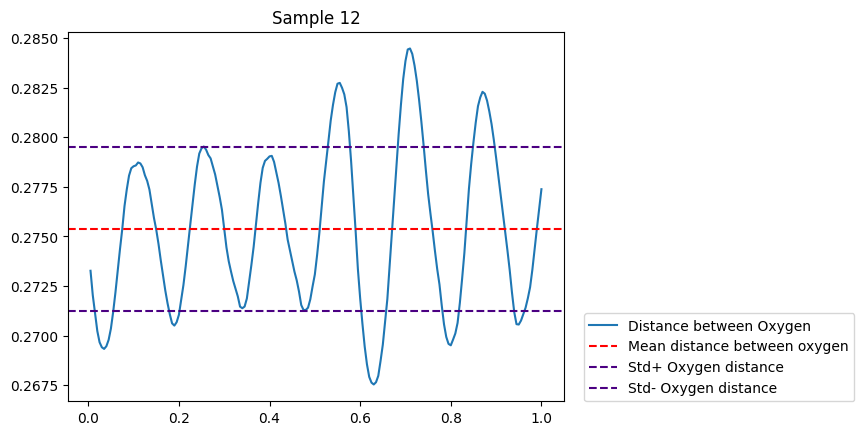

mean of distance Result9 0.27884194 Variance of distance Result9 3.7723632e-05
mean of distance Result10 0.275766 Variance of distance Result10 5.0698577e-06
mean of distance Result11 0.2765927 Variance of distance Result11 4.3957793e-05
mean of distance Result12 0.27536404 Variance of distance Result12 1.7218536e-05
mean of distance Result14 0.27588695 Variance of distance Result12 1.6953984e-05


In [13]:
plt.plot(SWresult_9["time"],SWresult_9["rOO"])
plt.axhline(y= np.mean(SWresult_9["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["rOO"])+np.std(SWresult_9["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_9["rOO"])-np.std(SWresult_9["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 9")
plt.show()
plt.plot(SWresult_10["time"],SWresult_10["rOO"])

plt.axhline(y= np.mean(SWresult_10["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["rOO"])+np.std(SWresult_10["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_10["rOO"])-np.std(SWresult_10["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 10")
plt.show()

plt.plot(SWresult_14["time"],SWresult_14["rOO"])
plt.axhline(y= np.mean(SWresult_14["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["rOO"])+np.std(SWresult_14["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_14["rOO"])-np.std(SWresult_14["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 14")
plt.show()

plt.plot(SWresult_11["time"],SWresult_11["rOO"])
plt.axhline(y= np.mean(SWresult_11["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["rOO"])+np.std(SWresult_11["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_11["rOO"])-np.std(SWresult_11["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 11")
plt.show()

plt.plot(SWresult_12["time"],SWresult_12["rOO"])

plt.axhline(y= np.mean(SWresult_12["rOO"]), color ="red", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["rOO"])+np.std(SWresult_12["rOO"]), color ="indigo", linestyle ="--")
plt.axhline(y= np.mean(SWresult_12["rOO"])-np.std(SWresult_12["rOO"]), color ="indigo", linestyle ="--")
plt.legend(["Distance between Oxygen", 
"Mean distance between oxygen",
"Std+ Oxygen distance","Std- Oxygen distance"], loc=(1.04,0))
plt.title("Sample 12")
plt.show()


print("mean of distance Result9",np.mean(SWresult_9["rOO"]), "Variance of distance Result9",np.var(SWresult_9["rOO"]))
print("mean of distance Result10",np.mean(SWresult_10["rOO"]), "Variance of distance Result10",np.var(SWresult_10["rOO"]))
print("mean of distance Result11",np.mean(SWresult_11["rOO"]), "Variance of distance Result11",np.var(SWresult_11["rOO"]))
print("mean of distance Result12",np.mean(SWresult_12["rOO"]), "Variance of distance Result12",np.var(SWresult_12["rOO"]))
print("mean of distance Result14",np.mean(SWresult_14["rOO"]), "Variance of distance Result12",np.var(SWresult_14["rOO"]))

Ans > All mean and Variance are reported above. Oscillations are observed for each condition, for sample 9, 10, 14 we can see the oscillated distance increasing more and more, this is with increasing time. For increasing dT, sample 9, 11, 12 this time we see relatively constant fluctuations or oscillations

### 3 - Liquid Argon - NVT

Use the function `simulate_argon()` to perform an NVT simulation of liquid argon. Report all parameters of the simulation (i.e. the total number of atoms, the temperature, the density, the time step, the number of time steps, etc.). Use the suggested T and density values. Increase the number of time steps to improve the quality of your results.

In [14]:
def simulate_argon(parms):

    from functions import arBox

    parm_error = arBox.check_parms(parms)

    if not parm_error:
        arBox.prepare_system(parms)
        arBox.minimize()
        arBox.equilibrate(parms)
        arBox.prepare_sim(parms)
        arBox.run_sim(parms)
        
        results = arBox.v_analysis()
        return(results)

    else:
        results = None

In [112]:
arparms_1 = {
    'steps':100,
    'skip_steps':10,
    'temperature':300.,
    'equil_steps':100,
    'N':200,
    'density':0.9
}
arparms_2 = {
    'steps':100,
    'skip_steps':10,
    'temperature':300.,
    'equil_steps':100,
    'N':300,
    'density':0.9
}
arparms_3 = {
    'steps':100,
    'skip_steps':10,
    'temperature':300.,
    'equil_steps':100,
    'N':400,
    'density':0.9
}
arparms_4 = {
    'steps':100,
    'skip_steps':10,
    'temperature':300.,
    'equil_steps':100,
    'N':500,
    'density':0.9
}
arparms_5 = {
    'steps':100,
    'skip_steps':10,
    'temperature':300.,
    'equil_steps':100,
    'N':500,
    'density':0.9
}
# run sim here
Aresults1 = simulate_argon(arparms_1)

Aresults1.keys()

The size of the periodic box is:  [Quantity(value=Vec3(x=2.0594033385430914, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.0594033385430914, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.0594033385430914), unit=nanometer)]
Minimizing...
Initializing velocities to Boltzmann distribution
Equilibrating...
Simulation beginning...
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
1010.0%	1010	-993.2800746254574	231.31057143918173	0	--
1020.0%	1020	-987.760354088875	231.20984833611465	27.5	23:59:58
1030.0%	1030	-985.5390554220832	227.35001081250482	27.3	23:59:58
1040.0%	1040	-985.6421221535875	230.76970383428497	27.7	23:59:58
1050.0%	1050	-988.560396523048	231.5261366252442	25.1	23:59:57
1060.0%	1060	-993.0101843363242	234.4239243800023	25.1	23:59:57
1070.0%	1070	-996.3378863077635	237.2124600553556	25.4	23:59:57
1080.0%	1080	-998.4150704320665	240.08457933377974	25.3	23:59:57
1090.0%	1090	-998.8008719817

dict_keys(['potE', 'time', 'nsteps', 'mean', 'variance'])

1. Use the function `arBox.v_analysis()` to calculate the average potential energy. The function returns a dictionary. Vary the number of particles in the simulation box (e.g. $N= 200, 300, 400, 500$) and note the change in average potential energy per particle $V/N$. What happens as the system size increases? (Note that the function returns the total potential energy). Estimate the standard error bars of the average potential energy per particle (hint, you need the variance of your data along with the total number of steps).

In [48]:
from functions import arBox
results1 = arBox.v_analysis()

Aresults2 = simulate_argon(arparms_2)
results2 = arBox.v_analysis()

Aresults3 = simulate_argon(arparms_3)
results3 = arBox.v_analysis()

Aresults4 = simulate_argon(arparms_4)
results4 = arBox.v_analysis()
print(results1)
print(np.mean(results1["potE"]))

The size of the periodic box is:  [Quantity(value=Vec3(x=2.3574283327921575, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.3574283327921575, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.3574283327921575), unit=nanometer)]
Minimizing...
Initializing velocities to Boltzmann distribution
Equilibrating...
Simulation beginning...
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
1010.0%	1010	-1414.1980546673458	276.83827640628573	0	--
1020.0%	1020	-1417.8408056525764	277.69585073751244	14.9	23:59:55
1030.0%	1030	-1424.709943492776	278.3151085621714	14.7	23:59:55
1040.0%	1040	-1432.0742664685895	283.4132875574581	14.4	23:59:55
1050.0%	1050	-1438.3862832260766	285.43191323075354	14.6	23:59:55
1060.0%	1060	-1442.2446057112097	287.8866546387475	15.1	23:59:55
1070.0%	1070	-1441.2670593719151	288.7460619336624	15.2	23:59:55
1080.0%	1080	-1437.3913824309543	288.00143691568775	15.4	23:59:55
1090.0%	1090	-1433.3

In [49]:
print("V/N sample 1:",results1["mean"]/200)
print("standard error for sample 1:",np.sqrt(results1["variance"])/results1["nsteps"])
print("V/N sample 2:",results1["mean"]/300)
print("standard error for sample 2:",np.sqrt(results2["variance"])/results2["nsteps"])
print("V/N sample 3:",results1["mean"]/400)
print("standard error for sample 3:",np.sqrt(results3["variance"])/results3["nsteps"])
print("V/N sample 4:",results1["mean"]/500)
print("standard error for sample 4:",np.sqrt(results4["variance"])/results4["nsteps"])


V/N sample 1: -11.868870849609374
standard error for sample 1: 0.5513496780395508
V/N sample 2: -7.91258056640625
standard error for sample 2: 0.34247615814208987
V/N sample 3: -5.934435424804687
standard error for sample 3: 0.5012291717529297
V/N sample 4: -4.74754833984375
standard error for sample 4: 0.6332037353515625


Ans > With increasing size the potential energy seems to be increasing , if we consider it going from a negative number to a positive number. In terms of |PotE| it would appear to be decreasing.

2. The pair correlation function (or radial distribution function) $g(r)$ is describes how density varies as a function of distance from a reference particle. The quantity $\rho g(r)$ is the average density of particles at $r$ given that a tagged particle is at the origin. The radial distribution function is usually determined by calculating the distance between all particle pairs and binning them into a histogram.

Use `arBox.gen_pair_dist()` to calculate $g(r)$ for the simulations above.
The script creates a histogram file: `/work/Ar_histo` where each row is the bin edge and the associated height of that bin. The bin spacing should be roughly ~ $0.01$.
Use those values to plot $g(r)$ (as a function of distance $r$). What happens to the $g(r)$ as the system size increases?

In [113]:
Aresults5 = simulate_argon(arparms_5)
results5 = arBox.v_analysis()
Aresults5
results5

Aresults1
results1
arBox.gen_pair_dist()
result_file = '/work/Ar_histo'




The size of the periodic box is:  [Quantity(value=Vec3(x=2.7950403509078656, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.7950403509078656, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.7950403509078656), unit=nanometer)]
Minimizing...
Initializing velocities to Boltzmann distribution
Equilibrating...
Simulation beginning...
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
1010.0%	1010	-2389.956614100674	259.42206207823693	0	--
1020.0%	1020	-2389.1871453531576	260.1384675453842	8.65	23:59:51
1030.0%	1030	-2388.384305468452	260.9865892280019	8.34	23:59:51
1040.0%	1040	-2389.8125832298974	261.2348603845046	8.51	23:59:51
1050.0%	1050	-2392.8514131095503	265.4001617239368	8.31	23:59:51
1060.0%	1060	-2395.962861618843	267.9245583297701	8.29	23:59:51
1070.0%	1070	-2400.098373115885	268.77094822445696	8.4	23:59:51
1080.0%	1080	-2406.156435649935	270.4978966603809	8.34	23:59:50
1090.0%	1090	-2412.45243484

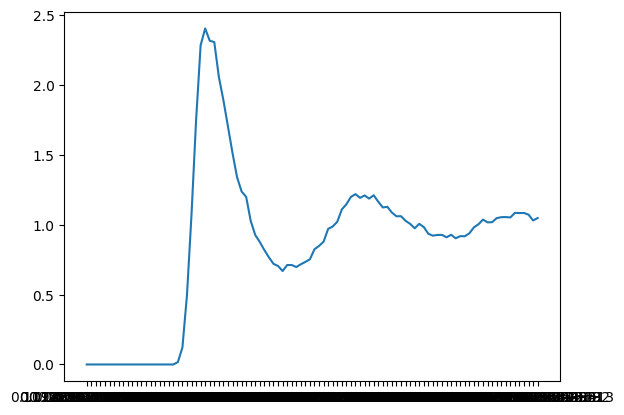

In [105]:
#N=200
x = []
y = []

for line in open(result_file, 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(float(lines[1]))
      
plt.plot(x, y)
plt.show()

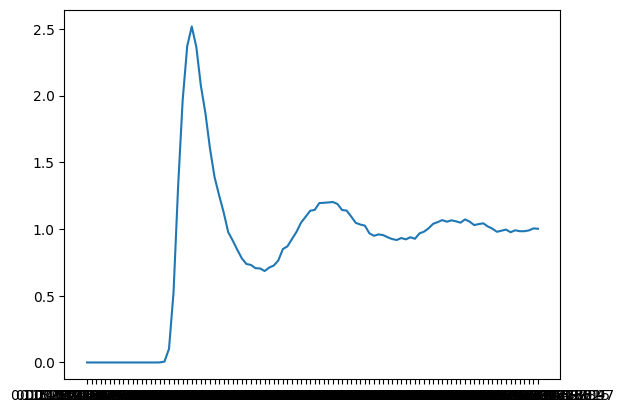

In [108]:
#N=300
x = []
y = []

for line in open(result_file, 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(float(lines[1]))
      
plt.plot(x, y)
plt.show()

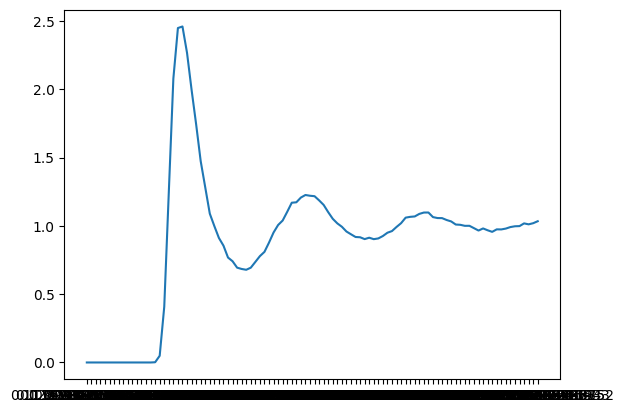

In [111]:
#N=400
x = []
y = []

for line in open(result_file, 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(float(lines[1]))
      
plt.plot(x, y)
plt.show()

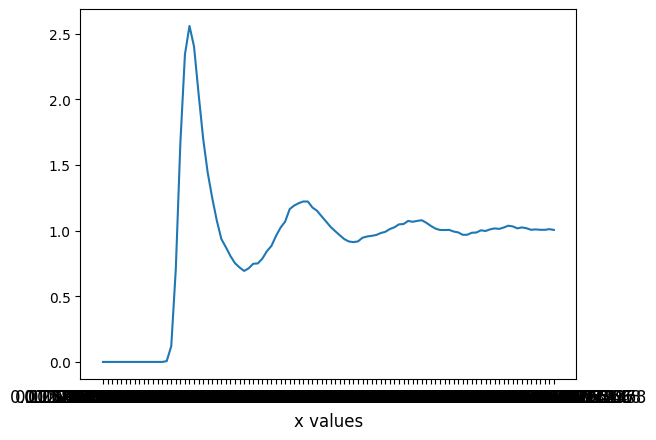

In [117]:
#N=500
x = []
y = []

for line in open(result_file, 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y.append(float(lines[1]))
      
plt.plot(x, y)
plt.xticks(x, size=12)
plt.xlabel("x values", size=12)
plt.show()

Ans > I don't know what happens, I am not able to plot for the different size simulations, it takes the most recently defined sim, since ar_traj seems to be global. I have done something strange, I am increasing the number of particles individually and not running previous plots, this might be an issue if I need to run everything if not My answer will be below. There will be 4 coding blocks. Based on this jank method it appears that at larger sizes 1st shell peak is narrower and subsequent peaks also become more pronounced

3. The number of neighbours up to a distance $r$ can be determined from the radial distribution functions using the definition $n(r) = 4\pi\rho\int_{0}^{r} g(x) x^2 dx$.
Calculate the number of neighbours in the first shell using the $g(r)$.
Show all your work.

In [122]:
type(arBox.gen_pair_dist())
#not sure how to do this, as you can tell I don't quite understand this function or how to access stuff from it
# The function does tell me N,and V which can be used for ρ, for nearest neighbors it is taking vlaues 
# or r until 1.3845, but based on the histo file it should be like 0.5 something, but idk how to set that.

There are  500  Argon atoms in the trajectory
There are  124750  Ar-Ar pairs
There are  100  steps in the trajectory
N =  500 V = 21.835556 Delta r = 1.3845449826717378
Number of neighbours =  11.834600000000002


NoneType

### 4 - Liquid Water - NVT

Perform an NVT MD simulation of liquid water using `simulate_liquidwater()`. Report all the parameters of the simulation (ie, the total number of atoms, the temperature, the density, the time step, the number of timesteps, etc.). Use the suggested T and density values. increase the number of time steps to improve the quality of your results. Also increase the size of the simulations box.

In [18]:
def simulate_liquidwater(parms):

    from functions import waterBox

    parm_error = waterBox.check_parms(parms)

    if not parm_error:
        waterBox.prepare_system(parms)
        waterBox.minimize()
        waterBox.equilibrate(parms)
        waterBox.prepare_sim(parms)
        waterBox.run_sim(parms)

In [124]:
parms_X = {
    'steps':100,
    'skip_steps':10,
    'temperature':300.,
    'equil_steps':100,
    'N':500,
    'Box_edge':7.*unit.nanometers
}

# run sim here
simulate_liquidwater(parms_X)


The size of the periodic box is:  [Quantity(value=Vec3(x=7.0, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=7.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=7.0), unit=nanometer)]
Minimizing...


KeyboardInterrupt: 

1. Use `waterBox.gen_pair_dist()` to calculate the $gOO(r)$ and $gOH(r)$ for the simulations above. The script creates two histogram files: `/work/OO_histo` and `/work/OH_histo`. Describe your results. What happens to the $g(r)$ as the system size increases?

In [20]:
from functions import waterBox
waterBox.gen_pair_dist()
results_OO = '/work/OO_histo'
results_OH = '/work/OH_histo'

There are  258  waters in the trajectory
There are  33153  O-O pairs
There are  132612  O-H pairs
There are  100  steps in the trajectory
There are  100  steps in the trajectory


In [20]:
x1 = []
y1 = []

for line in open(results_OO, 'r'):
    lines = [i for i in line.split()]
    x1.append(lines[0])
    y1.append(float(lines[1]))
      
plt.plot(x1, y1)

plt.show()

x2 = []
y2 = []

for line in open(results_OH, 'r'):
    lines = [i for i in line.split()]
    x2.append(lines[0])
    y2.append(float(lines[1]))
      
plt.plot(x2, y2)
plt.show()



Ans  > can't say this has been running for longer than 12min need to submit it soon so I guess we'll never know. I could restart everything but that will take longer.

![Picture title](image-20221102-232515.png)

2. Calculate the number of neighbours in the first shell using the $g(r)$. Show all your work.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b6e68fe-eff4-4993-8427-30eee469254c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>